In [25]:
%load_ext lab_black

from puzzles import load_lines

import numpy as np

s = load_lines(13)

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [14]:
len(coords), len(folds)

(863, 12)

In [40]:
def fold(q, c, x):

    result = None

    if c == "x":
        left = q[:, :x]
        right = q[:, x + 1 :][:, ::-1]

        d = left.shape[1] - right.shape[1]
        if d > 0:
            result = left
            result[:, d:] = result[:, d:] + right
        elif d < 0:
            d = abs(d)
            result = right
            result[:, d:] = result[:, d:] + left
        else:
            result = left + right

    else:  # c == 'y'

        top = q[:x]
        bottom = q[x + 1 :][::-1]

        d = top.shape[0] - bottom.shape[0]
        if d > 0:
            result = top
            result[d:] = result[d:] + bottom
        elif d < 0:
            d = abs(d)
            result = bottom
            result[d:] = result[d:] + top
        else:
            result = top + bottom

    return np.clip(result, 0, 1)

In [ ]:
A = """...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
...........
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........""".split()

In [57]:
A = np.zeros(coords.max(axis=0) + 1, dtype=np.uint8)

coords = s[: s.index("")]
coords = [[int(x) for x in c.split(",")] for c in coords]
coords = np.array(coords)

folds = s[s.index("") + 1 :]
folds = [l.split()[-1].split("=") for l in folds]
folds = [[t[0], int(t[1])] for t in folds]

A[coords[:, 0], coords[:, 1]] = 1

In [58]:
A.sum()

863

In [42]:
B = np.array(
    [
        [0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
    ]
)

In [43]:
fold(B, "x", 3)

array([[1, 1, 0],
       [1, 0, 0]])

In [35]:
A.sum()

863

In [33]:
import matplotlib.pyplot as plt

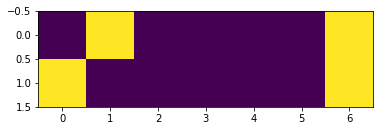

In [44]:
plt.imshow(B)

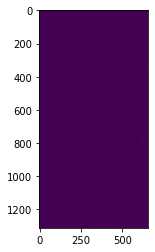

In [52]:
plt.imshow(A)

In [53]:
folds[0]

['x', 655]

In [49]:
for fold_params in folds:
    print("1")
    A = fold(A, *fold_params)
    break

1


In [50]:
A.sum()

863